<img   src="../figuras/logos/Logo TalentQ Azul.png" align=right  width="12%"/>
<br>


<table width="100%">
<td style="font-size:40px;font-style:italic;text-align:left;background-color:rgba(0, 220, 170,0.7)">
Circuitería cuántica elemental 
</td></table>


$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathbb H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $

In [1]:
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex

# Retroceso de Fase

Hemos estudiado ya el operador controlado $\cg{U}$ en el que el operador $U$ es aplicado dependiendo del estado en el que se encuentra el cúbit controlador. Es un error frecuente pensar que dicho cúbit controlador no se modifica.




Este es el  caso  cuando el estado sobre el cual actúa el operador $U$ es uno de sus autoestados 
(recuerda que los autovalores de  un operador unitario son fases puras)

$$
U\ket{u} = e^{i\lambda} \ket{u}
$$

 Supongamos que por el *cúbit controlador* circula una superposición $(a\ket{0}+b\ket{1})$ y un autoestado $\ket{u}$ de $U$ por el cúbit controlado. La acción de $\cg{U}$ es
<br>
<br>

$$
\cg{U}: (a\ket{0} + b\ket{1})\otimes \ket{u} ~\to ~ a\ket{0}\ket{u} + b \ket{1}e^{i\lambda}\ket{u}  = \left( a\ket{0}\ket{u} + be^{i\lambda} \ket{1} \rule{0mm}{4mm} \right)\otimes \ket{u}
$$
<br>

En resultado final es que la fase $e^{i\lambda}$ **ha modificado** el estado de entrada, mientras que el segundo cúbit no ha cambiado. 


La clave está en que, en el segundo paso, la fase generada por la acción de U *no pertenece* realmente a ninguno de los dos espacios sino al producto

De modo que puede adscribirse al primer espacio, como hemos hecho en el último paso

De ahí el nombre de *retroceso de fase*, en inglés "phase kickback"


El siguiente circuito resume la acción de retroceso de fase
<br>

<figure><center>
<a id='fig_ref'></a>
<img src="images/phase_kickback.png" align=center width='35%'/>
<center></center>
</center></figure>


<div class="alert alert-block alert-success">

<b>Ejercicio 1.3.1.1 </b> 
    
programa un circuito en el que  $U = P(\phi)$ es el operador de fase y el estado en el primer cúbit es $\ket{0}$ y en el segundo es $\ket{1}$. 
    
    
- Usando el *statevector_simulator* representa el estado de salida para distintos de valores de $\phi\in $ 
    
- ¿en qué plano rota el vector del primer cúbit? ¿Cómo podemos cambiar dicho plano de rotación?
</div>


# Circuitos Equivalentes



Es posible encontrar distintos circuitos que producen acciones idénticas sobre un estado arbitrario. Se denominan *circuitos equivalentes*. 

Matemáticamente, representan distintas descomposiciones del mismo operador unitario en *puertas simples*

## Conjugación


Una caso muy frecuente es la **conjugación** de una puerta $V$  por un **unitario** $U$


$$
V' = U V  U^\dagger  
$$

El operador conjugado $V'$ tiene **la misma acción** sobre la base *base rotada* $\{\ket{e'} = U\ket{e}\}$
que la que tiene $V$ sobre la original $\{\ket{e}\}$.

 Por ello, 
 - los *autovalores* de $V$ y de $V'$ son los *mismos* y 
 
 - los *autovectores* son los *rotados*

$$
\lambda' = \lambda ~~~~~~\hbox{y}~~~~~~  \ket{\lambda}' = U\ket{\lambda}
$$

Comprobémoslo

$$
\fbox{$V \ket{\lambda}= \lambda\ket{\lambda}$} ~~\Rightarrow ~~~V'\ket{\lambda}' = (UVU^\dagger) U\ket{\lambda} = UV\ket{\lambda} =  U(\lambda\ket{\lambda}) = \lambda U\ket{\lambda} = \lambda\ket{\lambda}' ~~\Rightarrow ~~~ \fbox{$ V' \ket{\lambda}' = \lambda\ket{\lambda}'$}
$$
<br>

Por ejemplo 


<figure><center>
<a id='fig_ref'></a>
<img src="images/H_conjugation.png" align=center width='50%'/>
<center></center>
</center></figure>
<br>

y,  equivalentemente, intercambiando $X \leftrightarrow Z$. 


<br>

- Este tipo de equivalencia se sigue de las identidades algebraicas
<br>
<br>
\begin{eqnarray}
HXH = Z ~~~~~&&~~ ~~~
HZH = X \nonumber
\end{eqnarray}
<br>
que son fáciles de visualizar recordando que  $H$ es una rotación de 180$^\circ$ en torno al eje diagonal en el plano $XZ$



<br>

- Análogamente
<br>
<br>
\begin{eqnarray}
S X S^\dagger  = Y~~~~~&&~~~ ~~~
S Y S^\dagger = -X  ~~~~~~~~ S Z S^\dagger = Z\nonumber\\
\end{eqnarray}
<br>
también  son fáciles de visualizar recordando que 
 $S=\sqrt{Z}$ es una rotación de $90^\circ$ en torno al eje $Z$.


### Conjugación de una exponencial

muchas puertas unitarias son de la forma $V = e^{\alpha A}$

Por ejemplo, si  $A = \hat{\bf n}\cdot \boldsymbol{\sigma} $ entonces $  ~\Rightarrow ~V= R_{\hat{\bf n}}(\theta)$ es el operador que rota un ángulo $\theta$ en torno al vector $\hat{\bf n}$ en la esfera de Bloch.

$$
 R_{\hat{\bf n}}(\theta) = e^{-i\frac{\theta}{2}\hat{\bf n}\cdot \boldsymbol{\sigma}}
$$



<div class="alert alert-block alert-info">
<p style="color: navy;">
<b>Lema:</b>
la conjugación de una exponencial se exponencia
<br>
</div>

\begin{eqnarray}
U e^{\alpha A} U^\dagger &=&  U \left(1 + \alpha A  + \frac{1}{2} \alpha^2 A^2 + ... \right) U^\dagger \\ \rule{0mm}{8mm}
&=& 1 + \alpha UAU^\dagger + \frac{1}{2}\alpha^2 UAU^\dagger U AU^\dagger + ... \\ \rule{0mm}{8mm}
&=& e^{ \alpha UAU^\dagger} 
\end{eqnarray}



Para el caso $A = \hat{\bf n}\cdot \boldsymbol{\sigma} $  la conjugación es
<br><br>
$$
U A U^\dagger ~\to ~U (\hat{\bf n}\cdot \boldsymbol{\sigma} ) U^\dagger = \hat{\bf n}'\cdot  \boldsymbol{\sigma} = A'
$$
<br>
donde $\hat{\bf n}' = U \hat{\bf n}$.

<div class="alert alert-block alert-info">
<p style="color: navy;">
<b>Corolario:</b>
  $~$ <i>la conjugación de una rotación en torno a un eje produce una rotación en torno al eje conjugado</i>
<br><br>
$$
U R_{\hat{\bf n}}(\theta) U^\dagger = R_{U\hat{\bf n}}(\theta)
$$
</div>


Por ejemplo:

\begin{eqnarray}
H R_z(\theta) H &=& e^{-i \theta/2 HZH} =  e^{-i (\theta/2) X}. \\ \rule{0mm}{8mm}
&=& R_x(\theta)
\end{eqnarray}

<br>
<figure><center>
<a id='fig_ref'></a>
<img src="images/HRzHconjugation.png" align=center width='70%'/>
<center></center>
</center></figure>
<br>


## 2 cúbits


 $\bullet$ La puerta  controlada $\cg{Z} =  {\rm diag}(1,1,1,-1)$   es simétrica ya que lo único que hace  es cambiar de signo al estado $\ket{11}$. Es decir


<br>
<figure><center>
<a id='fig_ref'></a>
<img src="images/Equiv_Z.png" align=center width='30%'/>
<center></center>
</center></figure>
<br>


 En realidad, $\cg{Z}$ es un caso particular de   $\cg{P(\phi)} = {\rm diag} (1,1,1, e^{i\phi})$, para la cual la equivalencia es la misma. 


$\bullet$   Otra equivalencia importante es

<br>
<figure><center>
<a id='fig_ref'></a>
<img src="images/Equiv_HH.png" align=center width='40%'/>
<center></center>
</center></figure>
<br>


Para probarla, observemos que las tres puertas del segundo cúbit se pueden componer para dar $HXH=Z$. Por el contrario, las dos puertas de Hadamard en el primer cúbit no se pueden multiplicar al haber un control entre ellas. 
Sin embargo, usando la  equivalencia anterior podemos invertir la puerta $\cg{Z}$ y, finalmente, conjugar en el primer cúbit $HZH=X$.



- Otra  equivalencia nada intuitiva pero muy importante relaciona tres operaciones CNOT con la permutación U$_{\rm SWAP}$


<br>
<figure><center>
<a id='fig_ref'></a>
<img src="images/Equiv_CNOTs.png" align=center width='40%'/>
<center></center>
</center></figure>
<br>



No hay una forma sencilla de probar esta identidad, así que lo recomendable es escribir las matrices asociadas a cada miembro y comprobar que son iguales


 

 $\bullet$  La puerta de phase global controlada, $\cg{K_\phi} = {\rm diag} (1,1,e^{i\phi}, e^{i\phi})$, secretamente, no es una puerta controlada


<br>
<figure><center>
<a id='fig_ref'></a>
<img src="images/Equiv_Kphase.png" align=center width='33%'/>
<center></center>
</center></figure>
<br>


También podemos comprobar la veracidad de las anteriores identidades programando los circuitos de ambos miembros

In [2]:
from qiskit import *
from qiskit.quantum_info import Statevector
U_simulator = Aer.get_backend('unitary_simulator')

qc_left= QuantumCircuit(2)
qc_right= QuantumCircuit(2)

qc_left.cx(0,1)
qc_left.cx(1,0)
qc_left.cx(0,1)
qc_right.swap(1,0)
 
print(qc_left)
print(qc_right)

U_left = execute(qc_left, backend = U_simulator).result().get_unitary()
U_right = execute(qc_right, backend = U_simulator).result().get_unitary()

          ┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘
        
q_0: ─X─
      │ 
q_1: ─X─
        


podemos comprobar que las matrices que representan los circuitos coinciden

In [3]:
from qiskit.tools.visualization import array_to_latex
array_to_latex(U_left, prefix="\\text{U_left = }\n")

<IPython.core.display.Latex object>

In [4]:
array_to_latex(U_right, prefix="\\text{U_right = }\n")

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success">
    <b>Ejercicio 1.3.1.2</b> 
<br> 
$~$ Demuestra las equivalencia de circuitos anteriores de dos formas:
<br>
$~~~$ - sobre el papel,  multiplicando las matrices asociadas
<br>
$~~~$ - en qiskit, componiendo los circuitos y extrayendo el operador unitario asociado
</div>


<div class="alert alert-block alert-success">
    <b>Ejercicio 1.3.1.3</b> 
 
    
comprueba la equivalencia de los dos circuitos siguientes, siempre que se verifique que $V^2 = U$


<br>
<figure><center>
<a id='fig_ref'></a>
<img src="images/CCUdecomposition.png" align=center width='35%'/>
<center></center>
</center></figure>
<br>
    
    
</div>


# Puertas de Clifford



<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Definición:</b> se define un <i>operador de Clifford</i>, $U$ como aquel que <i>conjuga</i> un operador de Pauli a otro operador de Pauli.
</p></div>

Los propios operadores de Pauli son operadores de Clifford.  La conjugación correspondiente simplemente refleja el operador de Pauli. Por ejemplo con $U=Z$

$$
ZXZ = -X~~~~~~~~~ZYZ = -Y ~~~~~~~~~ZZZ = Z 
$$


Pero vemos que también $H$ y $S$ son de Clifford. 
Por el contrario $T$ no es un operador de Clifford.

<div class="alert alert-block alert-danger">
<b>Notar:</b> 
    
La forma más fácil de calcular estas conjugaciones es  recordar el álgebra de operadores de Pauli

$$
X Y = i Z ~~~~~ Y Z = i X ~~~~~ ZX = iY
$$
donde todas involucran a $X,Y$ y $Z$ en orden cíclico.
También el hecho de que dos operadores de Pauli distintos anti-conmutan. Por ejemplo

$$
\{X,Y\} = XY + YX = 0
$$
</p></div>


Esta definición se extiende a puertas multi-cúbits. Un *operador de Clifford multicúbit* será aquel que conjuga una cadena de Pauli para dar otra cadena de Pauli. Por ejemplo

\begin{eqnarray}
(XXH) \, (YZX) \,  (XXH)^\dagger &=& XXH \otimes YZX \otimes XXH \\ \rule{0mm}{10mm}
&=& XYX \otimes  XZX \otimes HXH \\ \rule{0mm}{10mm}
&=& (-Y)\otimes (-Z) \otimes Z \\ \rule{0mm}{10mm} &=& YZZ
\end{eqnarray}

También podemos conjugar operadores obtenidos por exponenciación

$$
(XXH) \, e^{aYZX} \,  (XXH)^\dagger =e^{a XXH \otimes XZX \otimes XXH} =  e^{a YZZ}
$$

Para 2 cúbits la *clase de Clifford* admite puertas controladas.

$$
\cg{X} \, (X\otimes I)\,  \cg{X} = X \otimes X
$$

que copia el operador $X$ en el segundo cúbit




Esta identidad se puede demostrar gráficamente 

<br>
<figure><center>
<a id='fig_ref'></a>
<img src="images/clone_X.png" align=center width='90%'/>
<center></center>
</center></figure>
<br>


## Computación Cuántica Universal

El objetivo de un *computador cuántico universal* es el de ser capaz de implementar el operador unitario más general

$$
U  = \sum_x \ket{f(x)}\bra{x}
$$


<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Teorema</b> <i>(Barenco et. al. 1995):</i> 
<br>
cualquier operador unitario $U_n$ sobre $n$ cúbits puede expresarse como el producto de 
<br>
<br>   
-  puertas continuas de <i>un cubit</i> 
<br>  
<br>
-  puertas CNOT.
</p></div>

Por ejemplo la puerta controlada $\cg{P_\phi}$ admite la descomposición siguiente
<br>
<figure><center>
<a id='fig_ref'></a>
<img src="images/Equiv_Phase.png" align=center width='60%'/>
<center></center>
</center></figure>
<br>


La prueba del teorema de Barenco consta de varios pasos



1.  cualquier operador $U_n$ sobre $n$ cúbits se puede descomponer como *producto de operadores* $\cg{^kU}$  donde $U$ es un operador de 1 cúbit controlado por $k$ cúbits 

2. los operadores $\hbox{C}^kU$ se pueden descomponer como productos de un  operador $\cg{U}$ y puertas de Toffoli CCNOT


En general para $\cg{^kU}$ necesitamos $k-1$ ancillas


<br>
<figure><center>
<a id='fig_ref'></a>
<img src="images/CkUdecomposition.png" align=center width='40%'/>
<center></center>
</center></figure>
<br>


<a id="Toffolidecomposition"></a>
3. Las puertas de Toffoli puede descomponerse como productos de $H$, $\cg{X}$ y $\cg{S}$


<br>
<figure><center>
<a id='fig_ref'></a>
<img src="images/Toffolidecomposition.png" align=center width='45%'/>
<center></center>
</center></figure>
<br>


Este no es más que el caso particular  de la descomposición general de $\cg{^2U}$ usando $U = X = HZH=HSSH =  (HSH)(HSH)= V^2 ~~\Rightarrow ~~V = HSH$.

<a id="CUdecomposition"></a>
4. Una puerta $\cg{U}$ puede descomponerse de forma única usando tres rotaciones $A, B$ y $C$ que verifiquen

$$
ABC = I ~~~~~,~~~~ e^{i\delta}  AXBXC = U
$$

<br>
<figure><center>
<a id='fig_ref'></a>
<img src="images/CUdecomposition.png" align=center width='60%'/>
<center></center>
</center></figure>
<br>

En efecto, si el cúbit de control es $\ket{0}$ la fase $P(\delta)$ no le afecta y el operador efectivo en el segundo cúbit es $ABC= I$.

Por el contrario, si el primer cúbits es $\ket{1}$, entonces se aplica $AXBXC$ al segundo cúbit, y 
el operador $P(\delta)$ añade la fase global, que al ser global podemos pasársela al segundo cúbit, lo que hace $e^{i\delta} AXBXC = U$


<details>

Las dos condiciones  algebráicas admiten una solución única para un operador unitario genérico
   
$$
U = e^{i\delta}\begin{bmatrix}\displaystyle e^{-i(\alpha+\beta)/2}\cos\frac{\theta}{2} & \displaystyle - e^{i(-\alpha+\beta)/2}\sin\frac{\theta}{2}  \\  
\rule{0mm}{5mm}
\displaystyle   e^{i(\alpha-\beta)/2}\sin\frac{\theta}{2}  &\displaystyle e^{i(\alpha+\beta)/2}\cos\frac{\theta}{2}
\end{bmatrix} = e^{i\delta} AXBXC ~  \Longrightarrow ~
\left\{ \begin{array}{l} A = R_z(\alpha) R_y\left(\frac{\theta}{2}\right) \\ B = R_y\left(-\frac{\theta}{2}\right) R_z\left(-\frac{\alpha + \beta}{2}\right) \\
C = R_z\left( \frac{\beta-\alpha}{2}\right)\end{array}
\right.
$$

<i> Nota: </i>: $U\in U(2)$  es un operador unitario y  su determinante es una fase $\det U = e^{i\delta}$.     Por su parte $\det(AXBXC) = 1$, y por tanto es un elemento de $SU(2)$.  Por esta razón es necesario añadir la fase $e^{i\delta}$ para obtener un operador unitario general. 
    
    
</details>    



### Puertas universales


- La descomposición del teorema de Barenco es  una identidad exacta capaz de descomponer un conjunto infinito y continuo de operadores $U_n$ en puertas CNOT y puertas *continuas* $U$ 




- La computación cuántica *resistentes a errores ("fault tolerant")* demanda la **discretización** del proceso de computación.




- Existe un *conjunto discreto de puertas universales* susceptibles de ser programadas de manera resistente a errores 





 Puede ser diferente dependiendo de la plataforma utilizada. 

- En circuitos superconductores 

\begin{eqnarray}
\hbox{Shor basis}~~
 ~&:& ~~ \{ H, T, \hbox{CNOT}\}  \nonumber \\ \rule{0mm}{5mm}
\hbox{NCT}~ ~&:& ~~ \{ X,\hbox{CNOT}, \hbox{Toffoli}\}   \nonumber
\end{eqnarray}


- Es importante relacionar las puertas universales con *puertas nativas*

Por ejemplo, en ordenadores de iones atrapados hay las siguientes [puertas nativas](https://ionq.com/docs/getting-started-with-native-gates#introducing-the-native-gates)

$$
\{ \hbox{GPi},\hbox{Virtual}Z, \hbox{MS}\} 
$$

<br>
<br>
donde 
$$
\hbox{GPi} = \begin{bmatrix} 0 & e^{-i\phi} \\e^{i\phi} & 0 \end{bmatrix}~~~,~~~
\hbox{Virtual}Z = \begin{bmatrix} e^{-i\phi} & 0 \\ 0 & e^{i\phi} \end{bmatrix} ~~,~~~~
$$

y la puerta de Mølmer-Sørensen

$$
\hbox{MS}(\phi_1,\phi_2) = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 0 & 0 & e^{-i(\phi_1+\phi_2)} \\ 0 & 1 &-i e^{-i(\phi_1-\phi_2)} & 0 \\ 0 & -i e^{i(\phi_1-\phi_2)} & 1 & 0  \\ 
-ie^{i(\phi_1+\phi_2)} & 0 & 0 & 1 
\end{bmatrix}
$$



<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Teorema</b> <i>(Solovay Kitaev et. al. 1995):</i>   
<br>    
una puerta simple $U$ arbitraria puede ser aproximada con precisión $\epsilon$ usando una secuencia de puertas discretas 
$R$ en el siguiente sentido de proximidad
<br>
<br>
$$
\| (U - R)\|_{\infty} = \hbox{max}_{\ket{\psi}} \| (U - R)\ket{\psi} \|<\epsilon
$$
<br>    
donde la secuencia aproximante $R$ involucra   $\leq {\cal O}(\log^2(1/\epsilon))$ puertas de un conjunto discreto universal, 
</p></div>

Referencia: M.A. Nielsen y L.I. Chuang *Quantum Computation and Quantum Information*, pág. 197.


# Medidas de calidad en circuitos


A la hora de comparar algoritmos es deseable poder caracterizar los circuitos que intervienen.
Consideremos el siguiente circuito. 

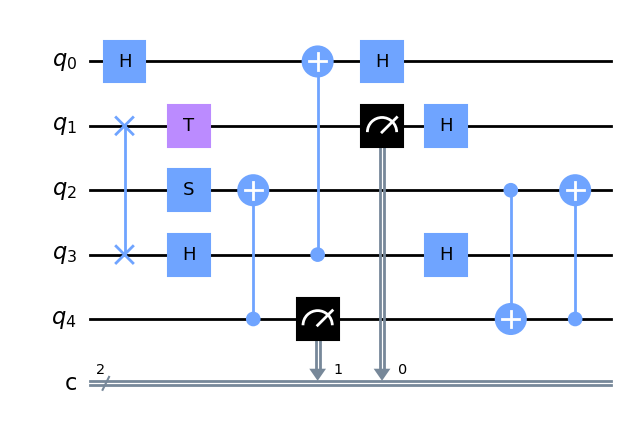

In [4]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(5,2)


qc.h(0)
qc.swap(3,1)
qc.h(3)
qc.cx(3,0)
qc.h([0,3])
qc.s([2])
qc.cx(4,2)
qc.measure(4,1)
qc.cx(2,4)
qc.cx(4,2)
qc.t(1)
qc.measure(1,0)
qc.h(1)
qc.draw('mpl')


Alguna medidas cuantitativas  permiten comparar la calidad de distintos circuitos que efectúan la misma tarea. 

- **anchura** *(width)*: es el número total de registros cuánticos y clásicos  que necesita.   

 El uso de ancillas incrementa la anchura de un circuito, y por tanto, reduce su calidad en comparación con otro circuito que tenga menor anchura. 


In [5]:
print('anchura=', qc.width())

anchura= 7


- **tamaño =  coste** *(size)*: el número de puertas  y aparatos de medida presentes en el mismo. 


In [6]:
print('tamaño=',qc.size())


tamaño= 14


- **complejidad**= es una medida de la *produndidad real* asociada al número de *puertas elementales* en las que se descompone un circuito. 

 Es un número a reducir. Sin embargo no es una medida inambigua ya que depende de la librería utilizada. Por ejemplo, si ésta es la NCT, entonces el coste del [circuito](#Toffolidecomposition) es 1. Sin embargo, si la librería es la tomada por $ \{ H, S, T, \hbox{CNOT}\} $
entonces el coste sube hasta 7. Por ello, a la hora de comparar circuitos es importante definirlos en la misma base. 


complejidad= 16


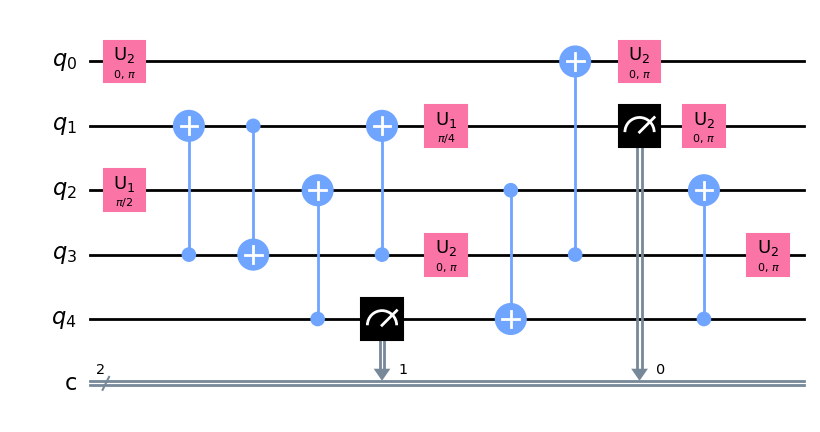

In [7]:
qc_dec=qc.decompose()
print('complejidad=', qc_dec.size())
qc_dec.draw('mpl')

- **profundidad**= para evaluar la *profundidad*  es necesario agrupar todas las puertas  que se puedan realizar en paralelo en cortes temporales de duración $\Delta$ (pulso).
 
 En particular puertas que actúen sobre registros diferentes no interferirán y se podrán paralelizar. 
 Por ejemplo, el [circuito que descompone $U$](#CUdecomposition)   tiene un coste igual a 6, pero una profundidad igual a 5. 
 



In [8]:
print('profundidad=', qc.depth())

profundidad= 5


- **factores unitarios**= un circuito es un operador unitario que puede estar formado por $r$ factores $U = U_1 U_2...U_r$. En el circuito cada factor se corresponde con un grupo de cúbits que están desconectados de los demás. Esto sólo afecta a las puertas lógicas, no a los aparatos de medida, que siempre son locales.

In [9]:
print('factores unitarios =', qc.num_unitary_factors())

factores unitarios = 2


No es evidente este resultado a priori, pero si permutamos los cúbits 2 y 3 el circuito muestra claramente esta factorización

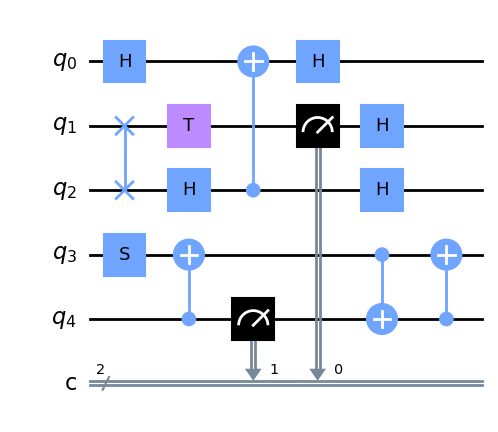

In [10]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(5,2)


qc.h(0)
qc.swap(2,1)
qc.h(2)
qc.cx(2,0)
qc.h([0,2])
qc.s([3])
qc.cx(4,3)
qc.measure(4,1)
qc.cx(3,4)
qc.cx(4,3)
qc.t(1)
qc.measure(1,0)
qc.h(1)
qc.draw('mpl')


<div class="alert alert-block alert-success">
<b>Ejercicio 1.3.1.4</b> 


1: Programa y ejecuta un circuito de 16 cúbits que prepare el estado $\ket{00\ldots 0} \to \frac{1}{\sqrt{2}}\left(\ket{00\ldots 0} + \ket{11\ldots 1}\right) $ 

2: Modifica la posición de los controladores hasta reducir la profundidad a 5.

</div>

# Complejidad computacional

Un algoritmo es una descomposición de una función en composición de un conjunto de *funciones primitivas*

A la hora de comparar estrategias de computación es necesario  analizar el coste relativo de diferentes algoritmos. Esta es la labor de teoría de la complejidad computacional. 

Como regla general, cada *modelo computacional* reducirá un problema complejo a una serie de pasos elementales (*operaciones primitivas*), a los que les asignaremos un coste computacional 1. 


La teoría de la *complejidad computacional* agrupa problemas por clases en las que el uso de recursos computacionales (tiempo o espacio) crece de forma similar. 

## Complejidad clásica:
<br>


 -  **P** ( *Polinómica*):  decimos que un problema pertenece a esta clase si puede ser resuelto en un tiempo ($t \sim $número de pasos) polinómico en el tamaño $n$ del dato de entrada $t\sim \exists k \Rightarrow  {\cal O}(n^k)\, $. 


- **BPP** ("*Bounded probabilistic polynomial*"): problemas que se pueden resolver mediante una máquina de Turing probabilística en tiempo polinómico y con una probabilidad de error $\leq 1/3$ para cualquier dato de entrada. 

- **NP** ("*No determinista Polinómica*"): clase de problemas que pueden ser  *verificados* en tiempo polinómico,
pero carecen de un algoritmo para ser resueltos en tiempo polinómico. 


Es evidente que **P**$\subseteq$ **NP**. No es evidente, aunque sí conjeturado, que **P**$\neq$ **NP**, siendo este un problema central en matemáticas. 




-  **NPC** (*NP-Completa*): es un subconjunto de **NPC**$\subset$**NP** que contiene a los problemas más difíciles en esta clase. 
<br>
<br>
 Un problema es **NPC** si cualquier  problema en **NP** puede aplicarse al mismo  mediante un algoritmo de coste polinómico. 




La importancia de esta subclase es que la resolución eficiente de uno solo de sus elementos implica lo mismo para toda la clase, o lo que es igual implicaría que **NP** = **P**.

Ejemplos de esta clase son  el *problema del viajante* y  el de la *satisfabilidad booleana*.


- **PSPACE**. Clase de problemas con necesidades de *memoria* exponencial en el tamaño del problema.

<div class="alert alert-block alert-warning">
<b> Ejemplos:</b> 

-  ejemplos de la clase <b>NP</b>: la <i>factorización entera</i>, o la evaluación de  <i>logaritmos discretos</i>,... 
    
    
- ejemplos de la clase <b>NPC</b> son el <i>problema del viajante</i>, la <i>coloración de grafos</i>, 
</div>


## Complejidad cuántica:
<br>

Decimos que un circuito es *eficiente* (*no-eficiente*) si su *coste* escala de forma *polinómica* (*exponencial*)  con la *anchura* del circuito. 

La descomposición de un operador unitario genérico $U(n)$ no será eficiente, puesto que viene especificado por un número exponencial $\sim 2^n\times 2^n$ de parámetros. 

Al igual que en computación clásica existen clases de complejidad cuánticas asociadas a familias de problemas que escalan de la misma manera.


 - **BQP** (*Bounded Quantum Polynomial*): clase de problemas para los que existe un algoritmos cuántico de coste polinómico y con una probabilidad de error $\leq 3$. Es el análogo cuántico de la clase **BPP**. 


 - **quantum NP**: clase de problemas que admiten un circuito polinómico en el número de cúbits que *verifica*  una eventual solución con probabilidad 1 si es correcta, y *rechaza* cualquier resultado que no sea solución con la misma fiabilidad. 

- **QMA** (*Quantum Merlin-Arthur*): admitiendo una probabilidad de error $\leq 1/3$ en la clase **quantum NP** obtenemos el análogo cuántico de la clase **NP**.  Existe una clase **QMA**-completa que contiene los problemas más duros en esta categoría. ´

<div class="alert alert-block alert-warning">
<b> Ejemplos:</b> 
    
- El ejemplo más famoso de problema  <b>QMA</b>-completo es determinar si la energía $E_0$ del estado fundamental de un Hamiltoniano $k-$local es $E_0\leq a$ o bien $E_0\geq a + 1/poly(n)$.
</div>


<div class="alert alert-block alert-danger">
<b> Notar:</b> 
    

La teoría de la complejidad computacional intenta establecer relaciones de inclusión entre estas clases. 
A parte de la mencionada <b> P $\subseteq$ NP </b> se  puede probar que

<p style="text-align:center;">   <b> P $\subseteq$ BPP $\subseteq$ BQP $\subseteq$ PSPACE </b>    </p>
    
</div>
